<a href="https://colab.research.google.com/github/niha21ah/ml-project/blob/mathias/ML_draft_tuesday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
per = pd.read_csv('WEC_Perth_49.csv')


---
# 1. EDA and Feature Engineering



Content:


*   Discuss Class imbalance
*   Scale
*   Plot




In [4]:
per.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77


In [ ]:
#summing all PowerXX columns:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 18.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 64.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [114]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np




In [4]:
features = []
for col in per.columns:
  if col[0]=='X' or col[0]=='Y':
    features.append(col)

features

['X1',
 'Y1',
 'X2',
 'Y2',
 'X3',
 'Y3',
 'X4',
 'Y4',
 'X5',
 'Y5',
 'X6',
 'Y6',
 'X7',
 'Y7',
 'X8',
 'Y8',
 'X9',
 'Y9',
 'X10',
 'Y10',
 'X11',
 'Y11',
 'X12',
 'Y12',
 'X13',
 'Y13',
 'X14',
 'Y14',
 'X15',
 'Y15',
 'X16',
 'Y16',
 'X17',
 'Y17',
 'X18',
 'Y18',
 'X19',
 'Y19',
 'X20',
 'Y20',
 'X21',
 'Y21',
 'X22',
 'Y22',
 'X23',
 'Y23',
 'X24',
 'Y24',
 'X25',
 'Y25',
 'X26',
 'Y26',
 'X27',
 'Y27',
 'X28',
 'Y28',
 'X29',
 'Y29',
 'X30',
 'Y30',
 'X31',
 'Y31',
 'X32',
 'Y32',
 'X33',
 'Y33',
 'X34',
 'Y34',
 'X35',
 'Y35',
 'X36',
 'Y36',
 'X37',
 'Y37',
 'X38',
 'Y38',
 'X39',
 'Y39',
 'X40',
 'Y40',
 'X41',
 'Y41',
 'X42',
 'Y42',
 'X43',
 'Y43',
 'X44',
 'Y44',
 'X45',
 'Y45',
 'X46',
 'Y46',
 'X47',
 'Y47',
 'X48',
 'Y48',
 'X49',
 'Y49']

# Pairwise distance, reflection symmetry and alginment score

In [40]:
per[features].head(1)

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49
0,600.0,0.0,546.16,37.5,489.79,74.88,432.47,112.05,650.0,0.0,...,400.0,800.0,346.16,837.5,289.79,874.88,232.47,912.05,0.0,1010.0


In [86]:
def compute_pairwise_dist(row):
  n = int(len(features)/2)
  coordinates = []

  for i in range(1, n+1):
      X = "X" + str(i)
      Y = "Y" + str(i)
      coordinates.append((float(row[X]), float(row[Y])))

  distances = []
  for i in range(n):
    x1,y1 = coordinates[i]
    for j in range(i+1,n):
      x2, y2 = coordinates[j]
      dist = np.sqrt((x1-x2)**2 + (y1-y2)**2)
      distances.append(dist)
  mean_pairwise_distance = np.mean(distances)
  return mean_pairwise_distance


compute_pairwise_dist(per.loc[0])

np.float64(529.8016596414119)

In [90]:
per['mean_dist'] = per[features].apply(compute_pairwise_dist, axis=1)
# features

In [98]:
per['mean_dist'].describe()

,mean_dist
count,36043.000000
mean,560.835120
std,34.097697
min,401.811247
25%,538.201779
50%,567.061115
75%,584.616740
max,647.876286


In [136]:
import numpy as np

def compute_reflection_symmetry(row):
    n = int(len(features) / 2)
    coordinates = []

    # Extract coordinates from the row
    for i in range(1, n + 1):
        X = "X" + str(i)
        Y = "Y" + str(i)
        coordinates.append((float(row[X]), float(row[Y])))

    coords = np.array(coordinates)
    cx, cy = np.mean(coords, axis=0)  # centroid

    # Reflect points over the vertical and horizontal axes
    reflected_x = np.array([[2*cx - x, y] for x, y in coords])
    reflected_y = np.array([[x, 2*cy - y] for x, y in coords])

    # Mean distance from reflected points to the nearest original point
    def mean_nearest_dist(reflected):
        return np.mean([np.min(np.linalg.norm(coords - pt, axis=1)) for pt in reflected])

    score_x = mean_nearest_dist(reflected_x)
    score_y = mean_nearest_dist(reflected_y)
    # normalized_score = 1 / (1 + score_x + score_y)

    mean_symmetry_score = -(score_x + score_y)  # Negative so higher is better
    return mean_symmetry_score


In [145]:
from sklearn.decomposition import PCA

def compute_alignment_score(row):
    n = int(len(features) / 2)
    coordinates = []

    for i in range(1, n + 1):
        X = "X" + str(i)
        Y = "Y" + str(i)
        coordinates.append((float(row[X]), float(row[Y])))

    coords = np.array(coordinates)

    pca = PCA(n_components=2)
    pca.fit(coords)

    # Ratio of explained variances (first over total)
    score = pca.explained_variance_ratio_[0]  # close to 1 means strong alignment
    return score


In [137]:
# compute_reflection_symmetry(per.iloc[1])
compute_reflection_symmetry(per.iloc[2072])


np.float64(-230.65222251127474)

In [138]:
per['reflection_symmetry'] = per[features].apply(compute_reflection_symmetry, axis=1)


In [146]:
per['alignment_score'] = per[features].apply(compute_alignment_score, axis=1)


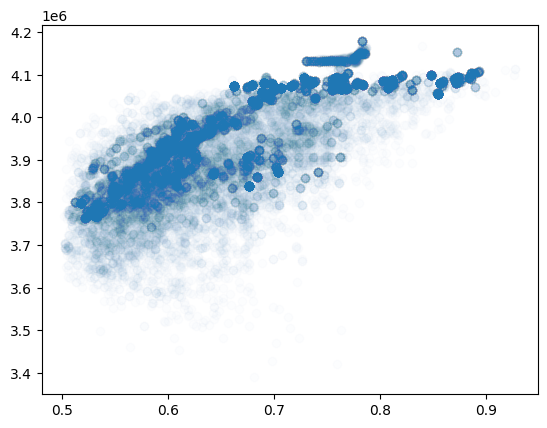

In [147]:
plt.scatter(per['alignment_score'], per['Total_Power'], alpha=0.01)

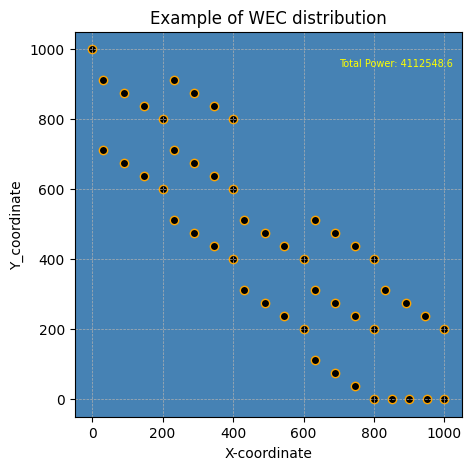

In [159]:
#plotting a few instances - general code

#obtaining X and Y coordinates
x_coordinates_cols = per.filter(regex = r'^X').columns
y_coordinates_cols = per.filter(regex = r'^Y').columns

#first need to combine X coordinates and Y coordinates into one array:
x_axis = per[x_coordinates_cols].values
y_axis = per[y_coordinates_cols].values

# Choose which instance to look at
instance = 20845

plt.figure(facecolor = 'white', figsize=(5,5))
plt.scatter(x=x_axis[instance], y=y_axis[instance], color='black', edgecolors = 'orange')
plt.title('Example of WEC distribution')
plt.xlabel('X-coordinate')
plt.ylabel('Y_coordinate')
plt.text(700,950, s = f'Total Power: {per["Total_Power"].iloc[instance]}', color='yellow', fontsize=7)
plt.grid(ls='--', linewidth=.5)

#setting the grid to blue
ax = plt.gca()
ax.set_facecolor("steelblue")

#plt.savefig('WEC_dist.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [158]:
per[per['alignment_score']==per['alignment_score'].max()]

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power45,Power46,Power47,Power48,Power49,qW,Total_Power,mean_dist,reflection_symmetry,alignment_score
20845,800.0,0.0,745.92,37.42,689.71,75.1,631.89,112.21,850.0,0.0,...,99186.39,101619.27,100784.17,99750.18,96241.66,0.87,4112548.6,493.658772,-447.302156,0.927843
35332,800.0,0.0,745.92,37.42,689.71,75.1,631.89,112.21,850.0,0.0,...,99186.39,101619.27,100784.17,99750.18,96241.66,0.87,4112548.6,493.658772,-447.302156,0.927843


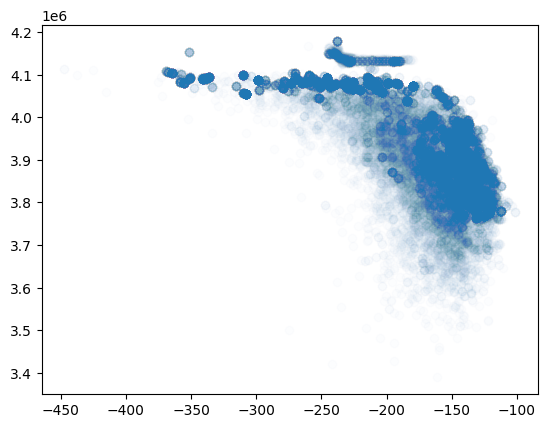

In [141]:
plt.scatter(per['reflection_symmetry'], per['Total_Power'], alpha=0.01)

In [142]:
per[per['reflection_symmetry']==per['reflection_symmetry'].max()]

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power,mean_dist,reflection_symmetry
11215,50.0,100.0,250.0,50.0,400.0,0.0,500.0,0.0,700.0,0.0,...,97667.68,91338.5,97891.7,87451.21,96873.84,96672.62,0.8,3778074.23,568.673971,-101.323161
11216,50.0,100.0,250.0,50.0,400.0,0.0,500.0,0.0,700.0,0.0,...,97667.68,91338.5,97891.7,87451.21,96873.84,96672.62,0.8,3778074.23,568.673971,-101.323161
11217,50.0,100.0,250.0,50.0,400.0,0.0,500.0,0.0,700.0,0.0,...,97667.68,91338.5,97891.7,87451.21,96873.84,96672.62,0.8,3778074.23,568.673971,-101.323161
11218,50.0,100.0,250.0,50.0,400.0,0.0,500.0,0.0,700.0,0.0,...,97667.68,91338.5,97891.7,87451.21,96873.84,96672.62,0.8,3778074.23,568.673971,-101.323161
11219,50.0,100.0,250.0,50.0,400.0,0.0,500.0,0.0,700.0,0.0,...,97667.68,91338.5,97891.7,87451.21,96873.84,96672.62,0.8,3778074.23,568.673971,-101.323161


<Axes: xlabel='mean_dist', ylabel='Count'>

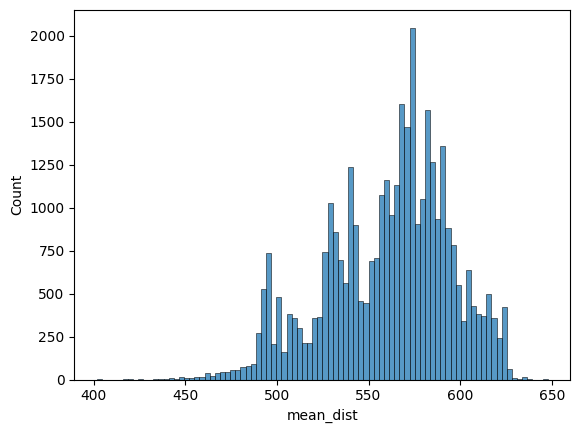

In [127]:
import seaborn as sns

sns.histplot(data = per, x='mean_dist')

In [104]:
per[per['mean_dist']==per['mean_dist'].max()]['Total_Power']

,Total_Power
3455,3846243.07


In [105]:
per.Total_Power.describe()

,Total_Power
count,3.604300e+04
mean,3.938246e+06
std,1.226171e+05
min,3.388944e+06
25%,3.847335e+06
50%,3.931541e+06
75%,4.063623e+06
max,4.177659e+06


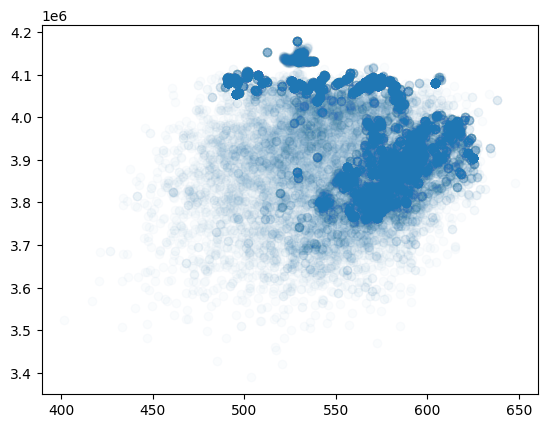

In [143]:
plt.scatter(per['mean_dist'], per['Total_Power'], alpha=0.02)

In [109]:
per[['mean_dist', 'Total_Power']].corr()

,mean_dist,Total_Power
mean_dist,1.000000,-0.160498
Total_Power,-0.160498,1.000000


In [160]:
per[per['mean_dist']==per['mean_dist'].max()]

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power45,Power46,Power47,Power48,Power49,qW,Total_Power,mean_dist,reflection_symmetry,alignment_score
3455,16.27,655.47,401.11,16.22,245.21,377.33,946.1,899.88,990.0,800.57,...,53050.33,92814.58,63271.97,75879.56,95448.07,0.81,3846243.07,647.876286,-144.509209,0.553747


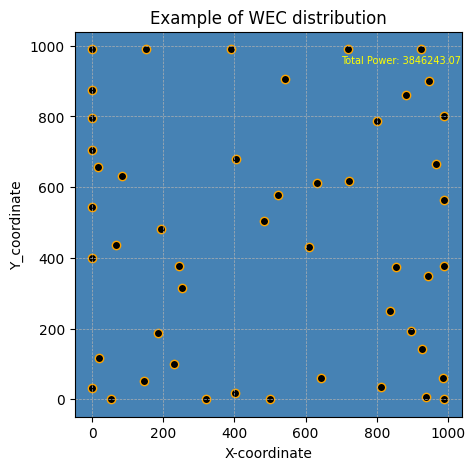

In [161]:
#plotting a few instances - general code

#obtaining X and Y coordinates
x_coordinates_cols = per.filter(regex = r'^X').columns
y_coordinates_cols = per.filter(regex = r'^Y').columns

#first need to combine X coordinates and Y coordinates into one array:
x_axis = per[x_coordinates_cols].values
y_axis = per[y_coordinates_cols].values

# Choose which instance to look at
instance = 3455

plt.figure(facecolor = 'white', figsize=(5,5))
plt.scatter(x=x_axis[instance], y=y_axis[instance], color='black', edgecolors = 'orange')
plt.title('Example of WEC distribution')
plt.xlabel('X-coordinate')
plt.ylabel('Y_coordinate')
plt.text(700,950, s = f'Total Power: {per["Total_Power"].iloc[instance]}', color='yellow', fontsize=7)
plt.grid(ls='--', linewidth=.5)

#setting the grid to blue
ax = plt.gca()
ax.set_facecolor("steelblue")

#plt.savefig('WEC_dist.pdf', dpi=300, bbox_inches='tight')
plt.show()

<h1>1. Support Vector Regressor (baseline model) with normal features</h1>

The research paper 'Hybrid machine learning models for predicting short-term wave energy flux' uses SVM + Multi-Objective Optimization (MOGWO). As there’s no plug-and-play MOGWO in sklearn and this is out of the scope of the course, we use GridSearchCV as a practical alternative for our baseline model.

We use the scikit learns SVR class insted of the LinearSVR class as SVR supports non-linear kernels ('rbf', 'poly', 'sigmoid', etc.) so we can model non linear relationships. One disadvantage of the SVR compared to LinearSVR is that it works slower for large datasets, especially with non-linear kernels. **Test LinearSVR??**

Support Vector Regression tries to fit a function that stays as close as possible to the actual data points, while allowing for a small margin of error (called ε-insensitive zone, or “street”).


*   Unlike ordinary regression that tries to minimize the error of every point, SVR instead tries to keep most datapoints within a margin (+- ε) around the predicted line or surface.
*   Pints inside the margin are ignored (no penalty)


*   Points outside are penalized, controlled by the C parameter.
*   The goal is to find a balance between tolerance of margin violations and simplicity of the model.


*   Training time complexity O(n**2⋅d) to O(n**3)







In [10]:
target = 'Total_Power'
# def scale_columns(df, cols):
#     scaler = StandardScaler()
#     scaled = df.copy()
#     scaled[cols] = scaler.fit_transform(scaled[cols])
#     return scaled, scaler
# per_scaled, scaler = scale_columns(per, features+[target])
# per_scaled

feature_scaler = StandardScaler()
target_scaler = StandardScaler()

X_scaled = feature_scaler.fit_transform(per[features])
y_scaled = target_scaler.fit_transform(per[[target]])


In [11]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

svr = SVR()
svr.fit(X_train, y_train.ravel())
y_pred = svr.predict(X_test)


In [ ]:
print(f"Intercept: {svr.intercept_}")
print(f"Coefficients of the support vector in the decision function.: {svr.dual_coef_}")

Intercept: [0.9762569]
Coefficients of the support vector in the decision function.: [[ 0.95230514 -1.          1.         ...  0.17141915  0.55788349
   1.        ]]


In [12]:
y_test_rescaled = target_scaler.inverse_transform(y_test)
y_pred_rescaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

r2 = r2_score(y_test_rescaled, y_pred_rescaled)
rmse = root_mean_squared_error(y_test_rescaled, y_pred_rescaled)

print("R²:", r2)
print("RMSE:", rmse)

NameError: name 'y_pred' is not defined

The R-squared tells us that 96.87% of the variance in the target variable (Total_Power) is explained by the features (X1–X49, Y1–Y49). The RMSE illustrates that on average, our model's predictions are off by ~21,487 Watts.

In [ ]:
parameters = svr.get_params().keys()
parameters

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [ ]:
params = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf']
}
# grid = GridSearchCV(SVR(), params, cv=3, scoring='neg_mean_squared_error')
grid = GridSearchCV(SVR(), params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)


grid.fit(X_train, y_train.ravel())
best_svr = grid.best_estimator_

In [ ]:
optimal_params = best_svr.get_params()
optimal_params

{'C': 10,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.01,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

The hyperparameter C is now set to 10 instead of 1.0 as in the initial model. Regularization parameter (higher C-> less reguralized). The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2. For an intuitive visualization of the effects of scaling the regularization parameter C, see Scaling the regularization parameter for SVCs.

We alsu see that the optimal kernel is the rbf (radial basis kernel). This kernel allows the SVR model to create non-linear decision boundaries or regression curves, because it implicitly maps the data into a higher-dimensional space where a linear separation (or fit) is easier.

https://www.youtube.com/watch?v=Qc5IyLW_hns

In [ ]:
y_best_pred = best_svr.predict(X_test)
y_best_pred_rescaled = target_scaler.inverse_transform(y_best_pred.reshape(-1, 1))
r2 = r2_score(y_test_rescaled, y_best_pred_rescaled)
rmse = root_mean_squared_error(y_test_rescaled, y_best_pred_rescaled)
print("R²:", r2)
print("RMSE:", rmse)

R²: 0.9735227079971863
RMSE: 19754.241922573256


In [ ]:
scores = cross_val_score(best_svr, X_train, y_train.ravel(), cv=3, scoring='neg_mean_squared_error')

Scores: [-0.03083303 -0.03046333 -0.03207079]
mean: 0.031122385493905252
std dev: 0.0006874001116884256


In [ ]:
rmse_scores = np.sqrt(-scores)
print("RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Std dev RMSE:", rmse_scores.std())

RMSE scores: [0.17559336 0.17453749 0.17908321]
Mean RMSE: 0.17640468372925758
Std dev RMSE: 0.001942434628466109


In [1]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
#model must be an instanciated ml model, could be: GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=300)
def KFOLD_test(model, n_splits, X_scaled, y_scaled, target_scaler):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_scores = []
    r_squared_scores=[]

    for train_index, val_index in kf.split(X_scaled):
        X_train_cv, X_val_cv = X_scaled[train_index], X_scaled[val_index]
        y_train_cv, y_val_cv = y_scaled[train_index], y_scaled[val_index]

        #i need this if i pass in a df, can you add a if else statement so it works for bot numpy arrays and dfs
        model.fit(X_train_cv, y_train_cv) #i get an error here becaus i pass in a numpy array
        #add to_numpy() after y train if you get an error

        y_pred_cv = model.predict(X_val_cv).reshape(-1, 1)

        # Inverse transform
        #if its a numpy arry i can do this directly
        if y_val_cv.ndim == 1:
          y_val_cv = y_val_cv.reshape(-1, 1)

        y_pred_inv = target_scaler.inverse_transform(y_pred_cv)
        y_val_inv = target_scaler.inverse_transform(y_val_cv)

        #if it recieves a dataframe i nned to do this
        # y_pred_inv = target_scaler.inverse_transform(y_pred_cv.reshape(-1, 1)) #when i pass in a nummpy arr
        # y_val_inv = target_scaler.inverse_transform(y_val_cv.values.reshape(-1, 1))


        rmse = np.sqrt(mean_squared_error(y_val_inv, y_pred_inv))
        rmse_scores.append(rmse)
        r_squared = (r2_score(y_val_inv, y_pred_inv))
        r_squared_scores.append(r_squared)

    print("Cross-validated RMSE (Watts) for each fold:", rmse_scores)
    print("Mean RMSE:", np.mean(rmse_scores))
    print("Std dev RMSE:", np.std(rmse_scores))
    print("\n--------------------------------------------")
    print("Cross-validated R-squared for each fold:", rmse_scores)
    print("Mean R-squared:", np.mean(r_squared_scores))
    print("Std dev R-squared:", np.std(r_squared_scores))


    return rmse_scores,r_squared_scores



K fold test with 3 splits

In [ ]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

rmse_scores = []

for train_index, val_index in kf.split(X_scaled):
    X_train_cv, X_val_cv = X_scaled[train_index], X_scaled[val_index]
    y_train_cv, y_val_cv = y_scaled[train_index], y_scaled[val_index]

    svr = SVR(kernel='rbf', C=10, epsilon=0.1)
    svr.fit(X_train_cv, y_train_cv.ravel())

    y_pred_cv = svr.predict(X_val_cv).reshape(-1, 1)

    # Inverse transform predictions and actuals to original scale
    y_pred_inv = target_scaler.inverse_transform(y_pred_cv)
    y_val_inv = target_scaler.inverse_transform(y_val_cv)

    rmse = np.sqrt(mean_squared_error(y_val_inv, y_pred_inv))
    rmse_scores.append(rmse)

# Final metrics
print("Cross-validated RMSE (Watts) for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("Std dev RMSE:", np.std(rmse_scores))


Cross-validated RMSE (Watts) for each fold: [np.float64(21573.149544935033), np.float64(21253.757461199635), np.float64(21928.474455099986)]
Mean RMSE: 21585.12715374489
Std dev RMSE: 275.5822355173168


five splits:

In [ ]:
KFOLD_test(SVR(C=10,
 cache_size=200,
 coef0=0.0,
 degree= 3,
 epsilon =0.01,
 gamma= 'scale',
 kernel= 'rbf',
 max_iter= -1,
 shrinking= True,
 tol= 0.001,
 verbose= False), 5, X_scaled, y_scaled, target_scaler)

Cross-validated RMSE (Watts) for each fold: [np.float64(19753.993441828512), np.float64(20310.964389985395), np.float64(20312.74174798908), np.float64(20741.09880112299), np.float64(21107.71704138332)]
Mean RMSE: 20445.30308446186
Std dev RMSE: 456.02977338729846


[np.float64(19753.993441828512),
 np.float64(20310.964389985395),
 np.float64(20312.74174798908),
 np.float64(20741.09880112299),
 np.float64(21107.71704138332)]

The mean RMSE from the cross validation is equal to 21585 watts, which is significantly higher than what we got from the train test split. However the optimized SVR still outperforms the first SVR model.

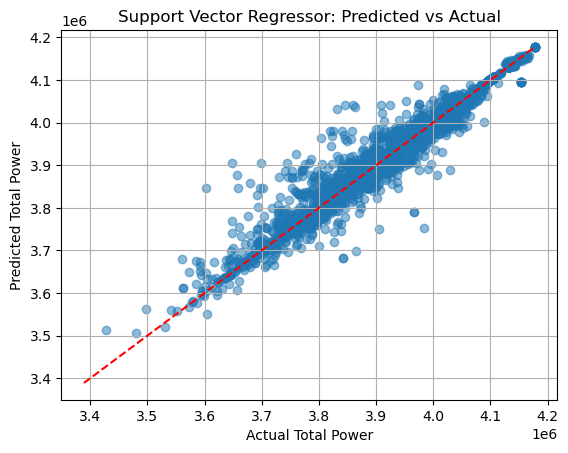

In [ ]:
def scatter_true_pred(target, y_test, y_pred, ml_model_name):
    y = per[[target]]
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Actual Total Power")
    plt.ylabel("Predicted Total Power")
    plt.title(f"{ml_model_name}: Predicted vs Actual")
    plt.grid(True)
    plt.show()
scatter_true_pred('Total_Power', y_test_rescaled, y_best_pred_rescaled, 'Support Vector Regressor')

From this plot and the histogram underneath, we see that the predicted power from the SVR is close to the actual power, especially in area around the mean of the actual total power and it seemes that the model misses more on the left fail of the distribution - the lower side of the mean, where it often overpredicts.

<Axes: xlabel='Total_Power', ylabel='Count'>

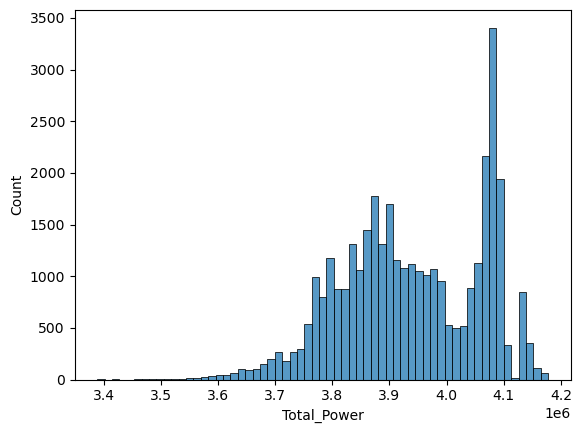

In [ ]:
sns.histplot(data=per, x='Total_Power')

In [ ]:
per.Total_Power.mean()

np.float64(3938246.455667397)

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

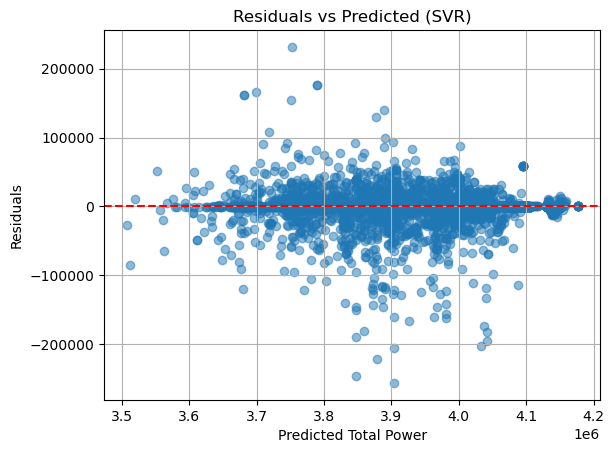

In [ ]:


residuals = y_test_rescaled.flatten() - y_best_pred_rescaled.flatten()
plt.scatter(y_best_pred_rescaled, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Total Power")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (SVR)")
plt.grid(True)
plt.show()


The residuals are more spread out on the left side of the mean total predicted power

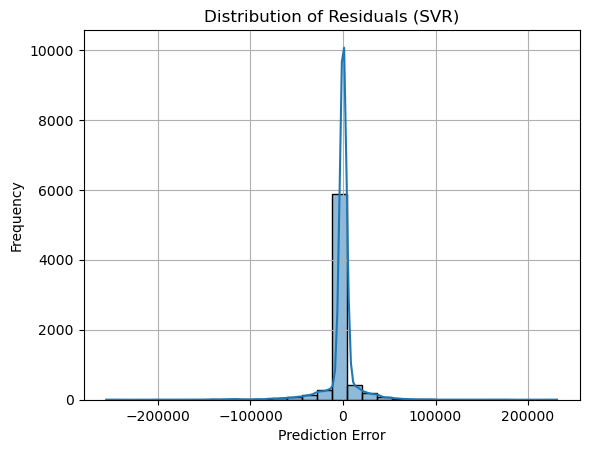

In [ ]:
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals (SVR)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
feature_x = 'X1'
feature_y = 'Y1'
x_range = np.linspace(per[feature_x].min(), per[feature_x].max(), 50)
y_range = np.linspace(per[feature_y].min(), per[feature_y].max(), 50)
xx, yy = np.meshgrid(x_range, y_range)

# # Prepare input for prediction
grid = pd.DataFrame({feature_x: xx.ravel(), feature_y: yy.ravel()})

# Fill missing features with mean values
for col in features:
    if col not in grid.columns:
        grid[col] = per[col].mean()

# Scale features using your feature scaler
grid_scaled = feature_scaler.transform(grid[features])
predicted = best_svr.predict(grid_scaled)
# predicted = predicted.reshape(xx.shape) #is scaled
predicted = target_scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(xx.shape)




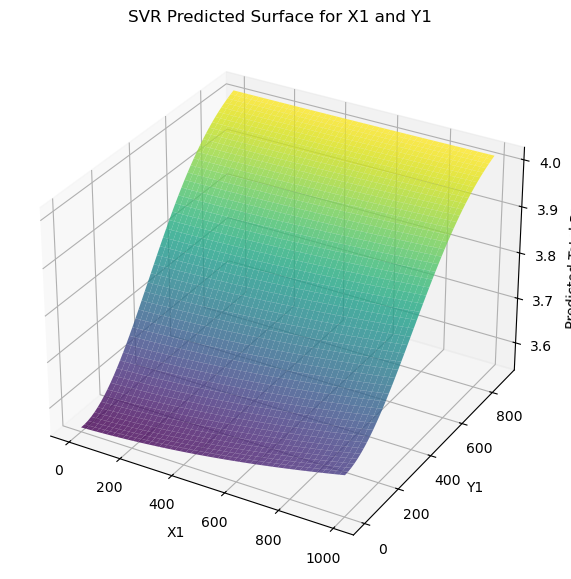

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx, yy, predicted, cmap='viridis', alpha=0.8)
ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)
ax.set_zlabel('Predicted Total Power')
ax.set_title('SVR Predicted Surface for X1 and Y1')
plt.show()


<h1>2. Some spice for the EDA</h1>

<h3>2.1 Plots</h3>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def tree_d_scatter(df, feature_x, feature_y, target):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot real power production
    ax.scatter(per[feature_x], per[feature_y], per[target], c='red', alpha=0.2, label='Actual Power')

    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    ax.set_zlabel('Actual Total Power')
    ax.set_title(f'Actual Total Power vs {feature_x} and {feature_y}')
    ax.legend()
    plt.show()


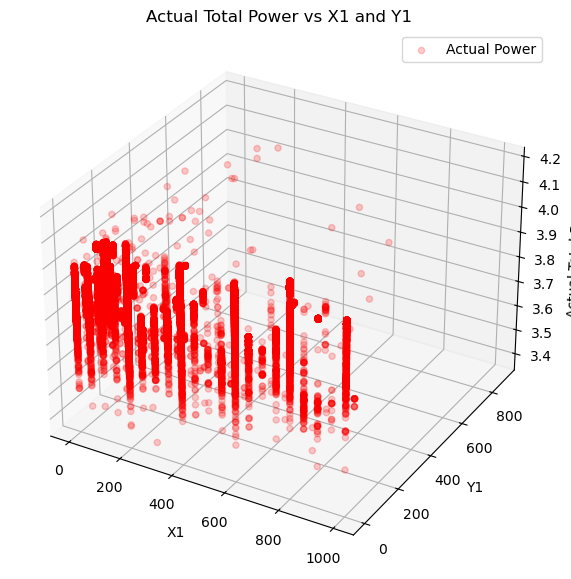

In [ ]:
tree_d_scatter(per, 'X1', 'Y1', target)

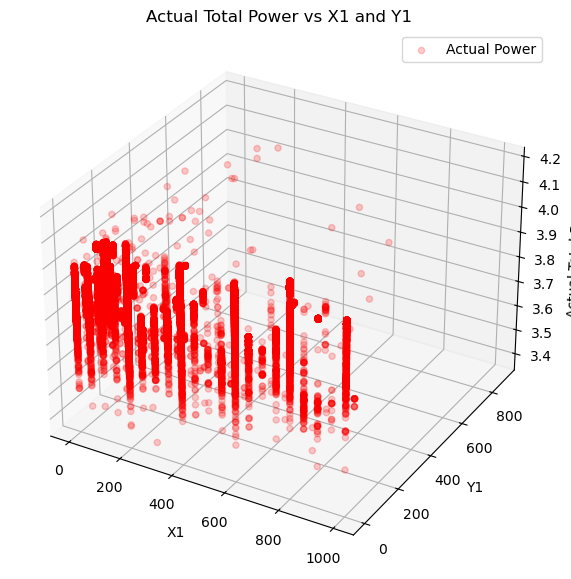

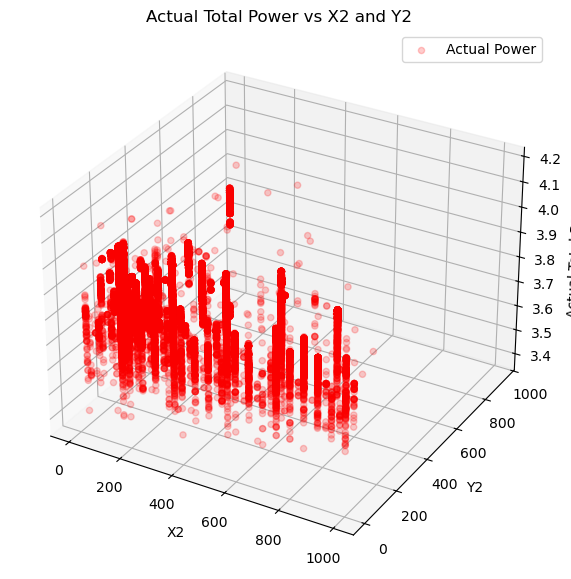

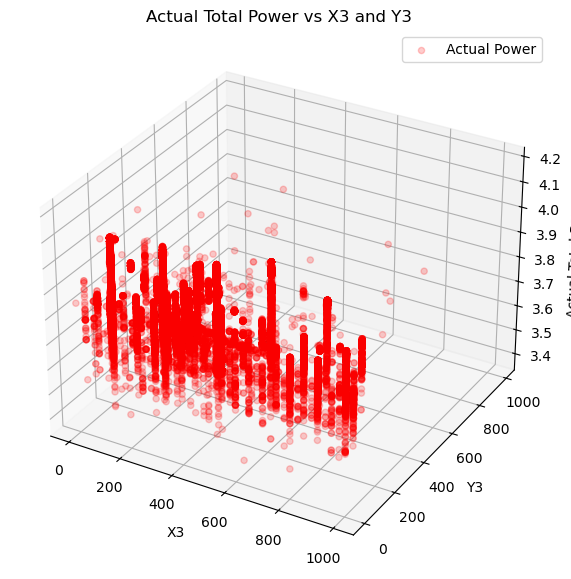

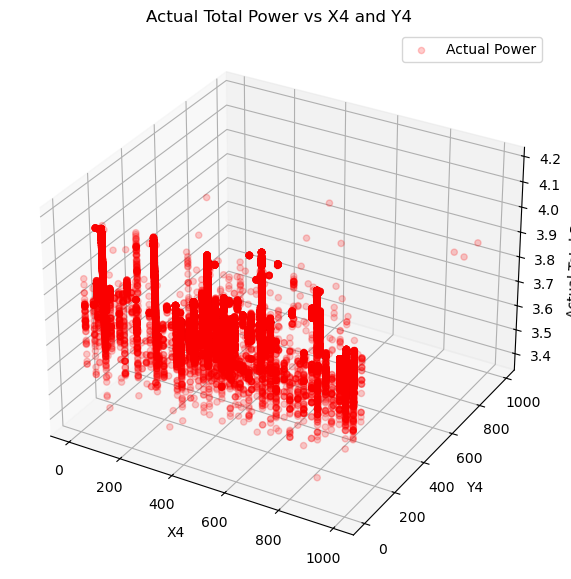

In [ ]:
for loc in [('X1', 'Y1'), ('X2', 'Y2'),('X3', 'Y3'),('X4', 'Y4')]:
    tree_d_scatter(per, loc[0], loc[1], target)


<h3>2.2 PCA for EDA</h3>

We want to use a PCA with 2 and 3 components to examine how the explained variance is distributed accross pricipal components and how the different position coorcinates (features) participate to this variance. This will also be visualized with 2d and 3d plots. In this part we include our target variable Total Power to the feature variable the pca is being trained on to also be able to assess the variance in relation to Total Power. Later when training models on PCA dimensionality reduced features we explude the target variable to avoid leakage.

In [ ]:
!pip install seaborn


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [110]:
from sklearn.decomposition import PCA
import seaborn as sns

In [111]:
def scale_columns(df, cols):
    scaler = StandardScaler()
    scaled = df.copy()
    scaled[cols] = scaler.fit_transform(scaled[cols])
    return scaled, scaler


We need to scale the variables before the PCA:

In [16]:
scaled_df, scaler = per_scaled, scaler = scale_columns(per, features+[target])
X = scaled_df[features+[target]]
y_binned = pd.cut(per[target], bins=3)
y_quartiles = pd.qcut(per[target], q=4)


<h4>2d-PCA</h4>

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
i=1
for var in pca.explained_variance_ratio_:
  print(f"Component {i} explaines {var*100}% of the total variance in the dataset")

Component 1 explaines 18.513579186404467% of the total variance in the dataset
Component 1 explaines 11.51397254230017% of the total variance in the dataset


A PCA with only two components do not perserve the variance of our data and we seem to loose about 80% of the variance due to this decomposation.

In [ ]:
loadings = pd.DataFrame(pca.components_.T,
                        index=X.columns,
                        columns=['PC1', 'PC2'])


print("Top Features in PC1 (Most Important for Variance):")
print(loadings['PC1'].abs().sort_values(ascending=False))

Top Features in PC1 (Most Important for Variance):
X49    0.185682
Y29    0.175498
Y15    0.165782
Y45    0.164993
Y9     0.163680
         ...   
Y12    0.010260
Y13    0.008247
Y3     0.004279
Y48    0.003038
X3     0.002672
Name: PC1, Length: 99, dtype: float64


In [ ]:
loadings = pd.DataFrame(pca.components_.T,
                        index=X.columns,
                        columns=['PC1', 'PC2'])


print("Top Features in PC2 (Most Important for Variance):")
print(loadings['PC2'].abs().sort_values(ascending=False))

Top Features in PC2 (Most Important for Variance):
Y14    0.197505
Y19    0.193869
Y13    0.191887
Y20    0.187566
Y12    0.186472
         ...   
X33    0.008848
X18    0.008475
X38    0.002483
X7     0.000071
X31    0.000036
Name: PC2, Length: 99, dtype: float64


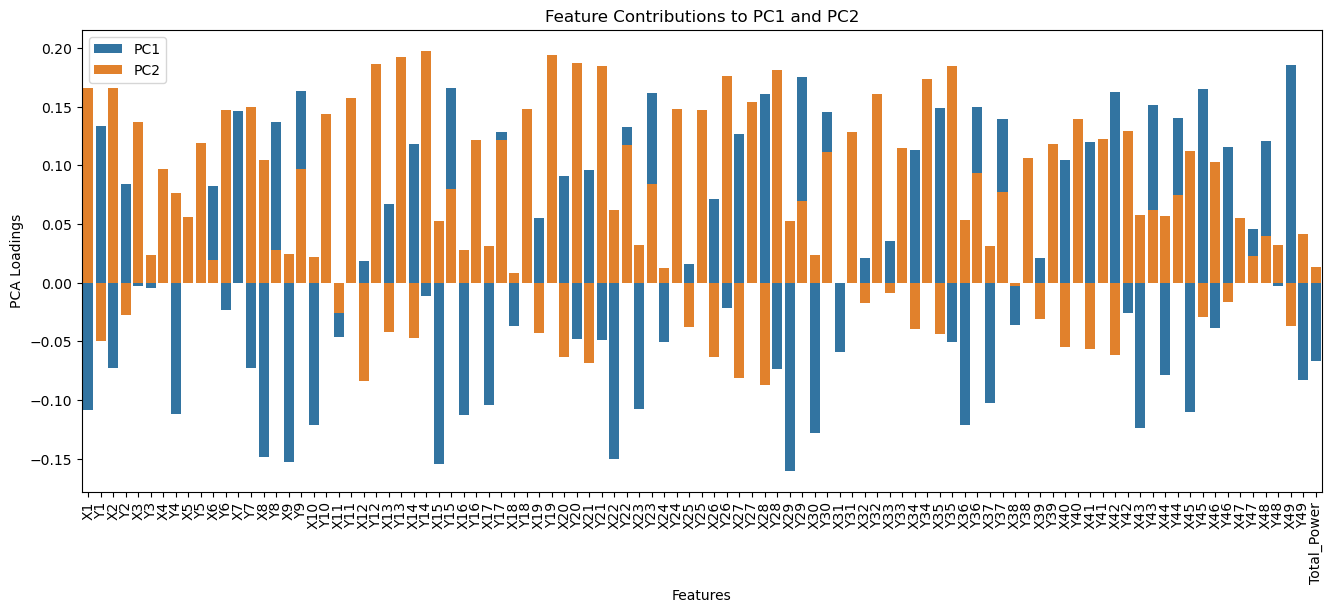

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x=features+[target], y=pca.components_[0], label='PC1')
sns.barplot(x=features+[target], y=pca.components_[1], label='PC2')
plt.legend()
plt.xlabel("Features")
plt.ylabel("PCA Loadings")
plt.title("Feature Contributions to PC1 and PC2")
plt.xticks(rotation=90)
plt.show()

Applied PCA to reduce  feature space from 90(?) to just 2 principal components: PC1 and PC2.

In [ ]:
X_pca = pca.transform(X)

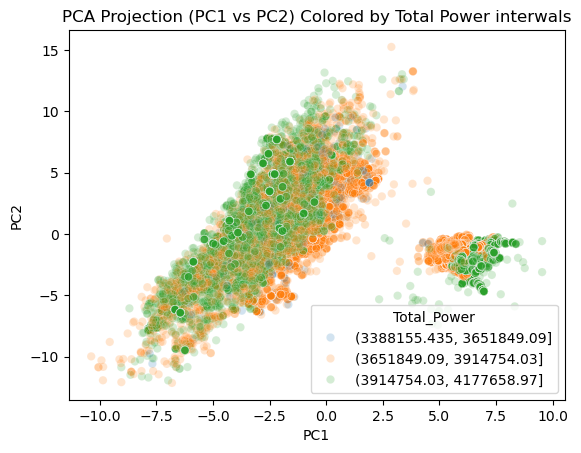

In [ ]:
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1], alpha=0.2, hue=y_binned)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('PCA Projection (PC1 vs PC2) Colored by Total Power interwals')
plt.show()

Its tricky to draw any insights from this plot. We see that most of the data are distributed accross the PC1 axis. There appears to be a denser cluster on the right-hand side of PC1 (around PC1 ≈ 7). This could indicate a subgroup of samples with similar feature values. You might explore whether these correspond to a specific time, turbine configuration, or weather condition. The quartile coloring shows some rough stratification along PC1, with higher total power bins slightly more concentrated on the right. However, the overlap is substantial, meaning PCA alone doesn't clearly separate high and low power observations.

Lets try 3 dimentional PCA

<h4>3d-PCA</h4>

In [ ]:
pca_3 = PCA(n_components=3)
pca_3.fit(X)

PCA(n_components=3)

In [ ]:
i=1
for var in pca_3.explained_variance_ratio_:
  print(f"Component {i} explaines {var*100}% of the total variance in the dataset")

Component 1 explaines 18.51357918640447% of the total variance in the dataset
Component 1 explaines 11.513972542300172% of the total variance in the dataset
Component 1 explaines 6.592636039495732% of the total variance in the dataset


We see that a PCA with 3 dimentions perserves more of the total variance.

In [ ]:
X_pca_3 = pca_3.transform(X)

In [ ]:
y_binned

,Total_Power
0,"(3914754.03, 4177658.97]"
1,"(3914754.03, 4177658.97]"
2,"(3914754.03, 4177658.97]"
3,"(3914754.03, 4177658.97]"
4,"(3651849.09, 3914754.03]"
...,...
36038,"(3914754.03, 4177658.97]"
36039,"(3914754.03, 4177658.97]"
36040,"(3914754.03, 4177658.97]"
36041,"(3914754.03, 4177658.97]"


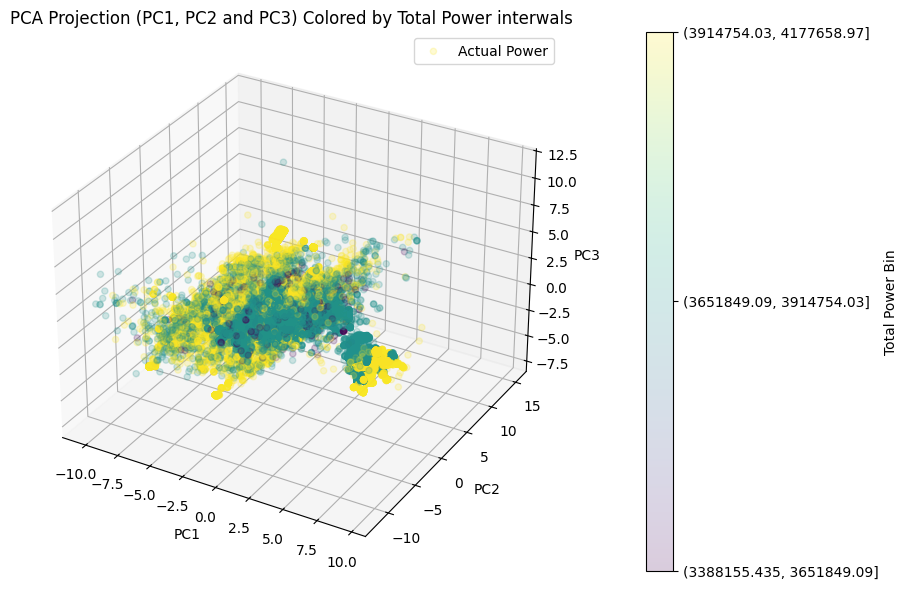

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2] , c=y_binned.cat.codes,cmap='viridis', alpha=0.2, label='Actual Power')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Projection (PC1, PC2 and PC3) Colored by Total Power interwals')
ax.legend()
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Total Power Bin")

tick_positions = range(len(y_binned.cat.categories))
tick_labels = [str(interval) for interval in y_binned.cat.categories]
cbar.set_ticks(tick_positions)
cbar.set_ticklabels(tick_labels)
plt.show()


There is significant overlap between points of different power intervals, suggesting that the first three PCs do not fully separate the quartile groups. This might indicate that more components are needed to capture the variance associated with Total Power, or that power production is not clearly separable in reduced space. This illustrates that the data might not be linearly distributed.

Some regions in the plot appear denser, which may imply underlying clusters or patterns in the original data—possibly tied to certain combinations of sensor values (X1–Y47).



It seems difficult to decompose the data into lower dimensions while retaining most of the variance. The variance appears to be spread fairly evenly across many of the wave energy converter features. Even after projecting onto 3 principal components, we retain only about 25% of the total variance, meaning roughly 75% is lost. This indicates that the dataset is high-dimensional with complex relationships.

However, dimensionality reduction may still be useful for visualization, noise reduction, or feeding simpler models—even if it doesn't capture all the variance.

<h4>49D-PCA</h4>

In [ ]:
pca_49 = PCA(n_components=int(len(features)/2))
pca_49.fit(X)

PCA(n_components=49)

This finally retains more of the variance. But it might not be useful for EDA:

In [ ]:
pca_49.explained_variance_.sum()

np.float64(91.92991615820493)

**Pros of using the PCA-transfromed data**


*   Removes feature redundancy which might help our models perform better.
*   Faster training, allthough 49 components may seem highm its still a reduction from 98 features. As SVR is computationally expencive, this could help.
*   Less overfitting: by removing noise and retaining most of the informative variance, PCA can act as a form of regularization.

*   It might help the model generalize better to unseen data.



**Cons of using the PCA-transfromed data**


*   We loose interpretability as the components are linear combinations of orignial features. thus we cant say 'this specific WEC contributed X amount to the prediction'.
*   Faster training, allthough 49 components may seem highm its still a reduction from 98 features. As SVR is computationally expencive, this could help. Thus our model might loose insights that might be of interest.
*   Less overfitting: by removing noise and retaining most of the informative variance, PCA can act as a form of regularization.

*   Linearity assumpton of the PCA might not align with the potential non-linear structure of our data. To tetain this structure we would have to use a kernel PCA.



Desucioon on not using this:Since engineers and planners may want to understand which WECs or layout patterns lead to better performance. PCA hides this completely and the fact non-linear relationships are likely — power output is influenced by wave interactions, shadowing effects, and WEC geometry. PCA may oversimplify this complex space.

<h3>KernelPCA</h3>

Kernel PCA helps to perform complex nonlinear projections for
dimensionality reduction.

In [17]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=0.01)

In [ ]:
kpca.fit(X)

KernelPCA(gamma=0.01, kernel='rbf', n_components=3)

In [ ]:
X_kpca = kpca.fit_transform(X)

In [ ]:
X.columns

Index(['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4', 'Y4', 'X5', 'Y5', 'X6', 'Y6',
       'X7', 'Y7', 'X8', 'Y8', 'X9', 'Y9', 'X10', 'Y10', 'X11', 'Y11', 'X12',
       'Y12', 'X13', 'Y13', 'X14', 'Y14', 'X15', 'Y15', 'X16', 'Y16', 'X17',
       'Y17', 'X18', 'Y18', 'X19', 'Y19', 'X20', 'Y20', 'X21', 'Y21', 'X22',
       'Y22', 'X23', 'Y23', 'X24', 'Y24', 'X25', 'Y25', 'X26', 'Y26', 'X27',
       'Y27', 'X28', 'Y28', 'X29', 'Y29', 'X30', 'Y30', 'X31', 'Y31', 'X32',
       'Y32', 'X33', 'Y33', 'X34', 'Y34', 'X35', 'Y35', 'X36', 'Y36', 'X37',
       'Y37', 'X38', 'Y38', 'X39', 'Y39', 'X40', 'Y40', 'X41', 'Y41', 'X42',
       'Y42', 'X43', 'Y43', 'X44', 'Y44', 'X45', 'Y45', 'X46', 'Y46', 'X47',
       'Y47', 'X48', 'Y48', 'X49', 'Y49', 'Total_Power'],
      dtype='object')

In [ ]:
print(kpca.eigenvalues_)

proportion = kpca.eigenvalues_ / np.sum(kpca.eigenvalues_)
print(proportion)

[2743.08183754 1222.04900352 1197.92744355]
[0.53129012 0.23669092 0.23201897]


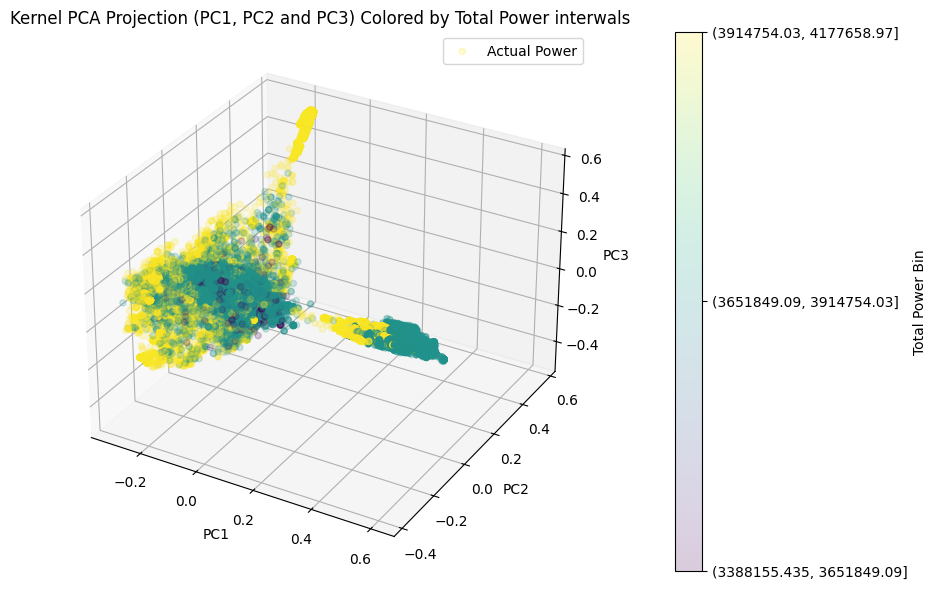

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_kpca[:,0], X_kpca[:,1], X_kpca[:,2] , c=y_binned.cat.codes,cmap='viridis', alpha=0.2, label='Actual Power')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Kernel PCA Projection (PC1, PC2 and PC3) Colored by Total Power interwals')
ax.legend()
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Total Power Bin")

tick_positions = range(len(y_binned.cat.categories))
tick_labels = [str(interval) for interval in y_binned.cat.categories]
cbar.set_ticks(tick_positions)
cbar.set_ticklabels(tick_labels)
plt.show()


<h1>3. SVR with kernel pca transformed data</h1>

Find the optimal gamma:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

pipeline = Pipeline([
    ("kpca", KernelPCA(n_components=3, kernel="rbf")),
    ("svr", SVR(C=10, kernel='rbf'))
])

# param_grid = {
#     "kpca__gamma": [0.0001, 0.001, 0.01, 0.1, 1],
# }
param_grid = {
    "kpca__gamma": [0.01],
    "kpca__n_components": [60, 70, 80, 90, 95]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=1)
grid_search.fit(X_train, y_train.ravel())

optimal_gamma = grid_search.best_params_['kpca__gamma']
optimal_n = grid_search.best_params_['kpca__n_components']

print("Best gamma:", optimal_gamma)
print("Optimal n_components:", optimal_n)



In [ ]:
y_pred = grid_search.predict(X_test)
y_best_rescaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
r2 = r2_score(y_test_rescaled, y_best_rescaled)
rmse = root_mean_squared_error(y_test_rescaled, y_best_rescaled)
print("R²:", r2)
print("RMSE:", rmse)

R²: 0.9726545921426463
RMSE: 20075.473078280615


This gives a pretty solid RMSE with only 80 componets

In [ ]:
best_kpca = grid_search.best_estimator_.named_steps['kpca']
proportion = best_kpca.eigenvalues_ / np.sum(best_kpca.eigenvalues_)
print(f"Perserves {proportion.sum()*100}% of the initial vairance") #might be misleading
print(f"{len(proportion)} features")

Perserves 100.0% of the initial vairance
80 features


WARNING:in KernelPCA, there is no direct or reliable way to calculate the explained variance ratio relative to the original input data, unlike in standard PCA.

In [ ]:
grid_search.cv_results_['mean_test_score']

array([-0.03524241, -0.0341109 , -0.03350661, -0.03288161, -0.03251721,
       -0.04246151, -0.04052847, -0.03907239, -0.03751308, -0.03646142,
       -0.33698688, -0.32715861, -0.31669997, -0.3117877 , -0.30784353])

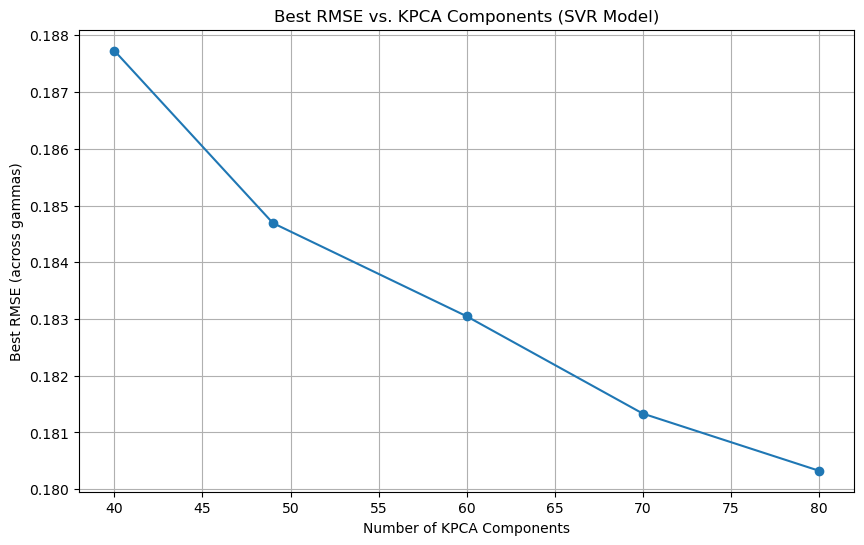

In [ ]:
import pandas as pd

# Create DataFrame from GridSearchCV results
results_df = pd.DataFrame(grid_search.cv_results_)

# Group by n_components and get the minimum RMSE for each
results_df['rmse'] = np.sqrt(-results_df['mean_test_score'])
best_rmse_per_n = results_df.groupby('param_kpca__n_components')['rmse'].min()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(best_rmse_per_n.index, best_rmse_per_n.values, marker='o')
plt.xlabel('Number of KPCA Components')
plt.ylabel('Best RMSE (across gammas)')
plt.title('Best RMSE vs. KPCA Components (SVR Model)')
plt.grid(True)
plt.show()


In [2]:
from sklearn.metrics import root_mean_squared_error
# kpca = KernelPCA(n_components=int(len(features)/2), kernel='rbf', gamma=0.01)   # use optimal_gamma

# # X_transformed = kpca.fit_transform(scaled_df[features])

# # X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_scaled, test_size=0.2, random_state=42)

# svr = SVR(C=10,
#  cache_size=200,
#  coef0=0.0,
#  degree= 3,
#  epsilon =0.01,
#  gamma= 'scale',
#  kernel= 'rbf',
#  max_iter= -1,
#  shrinking= True,
#  tol= 0.001,
#  verbose= False)
# svr.fit(X_train, y_train.ravel())
# y_pred = svr.predict(X_test)
# y_rescaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
# r2 = r2_score(y_test_rescaled, y_rescaled)
# rmse = root_mean_squared_error(y_test_rescaled, y_rescaled)
# print(f"R-squared: {r2}")
# print(f"RMSE: {rmse}")

def pca_model(model, pca, scaled_df,target_scaler, features, target):
  X_transformed = pca.fit_transform(scaled_df[features])
  y_scaled = scaled_df[target]
    #if you get an error remove to numpy()
  return KFOLD_test(model, n_splits=5, X_scaled=X_transformed, y_scaled=y_scaled.to_numpy().reshape(-1,1), target_scaler=target_scaler)
  # X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_scaled, test_size=0.2, random_state=42)

  # model.fit(X_train, y_train) #ravel?
  # y_pred = model.predict(X_test)
  # y_rescaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
  # # y_test_rescaled = target_scaler.inverse_transform(y_test)
  # y_test_rescaled = target_scaler.inverse_transform(y_test.values.reshape(-1, 1))

  # r2 = r2_score(y_test_rescaled, y_rescaled)
  # rmse = root_mean_squared_error(y_test_rescaled, y_rescaled)
  # print(f"R-squared: {r2}")
  # print(f"RMSE: {rmse}")
  # return model, pca








In [ ]:
kpca = KernelPCA(n_components=int(len(features)/2), kernel='rbf', gamma=0.01)   # use optimal_gamma

svr = SVR(C=10,
 cache_size=200,
 coef0=0.0,
 degree= 3,
 epsilon =0.01,
 gamma= 'scale',
 kernel= 'rbf',
 max_iter= -1,
 shrinking= True,
 tol= 0.001,
 verbose= False)

pca_model(svr,
          kpca,
          scaled_df,
          target_scaler,
          features,
          target)

In [21]:
scaled_df[target].to_numpy().reshape(-1,1) #might be the problem

array([[1.33926822],
       [1.34660808],
       [1.34920995],
       ...,
       [0.89554102],
       [1.01348717],
       [0.97294864]])

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=int(len(features)/2))
svr = SVR(C=10,
 cache_size=200,
 coef0=0.0,
 degree= 3,
 epsilon =0.01,
 gamma= 'scale',
 kernel= 'rbf',
 max_iter= -1,
 shrinking= True,
 tol= 0.001,
 verbose= False)

pca_model(svr,
          pca,
          scaled_df,
          target_scaler,
          features,
          target)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validated RMSE (Watts) for each fold: [np.float64(20063.298900776208), np.float64(21018.039360870764), np.float64(21063.98398045797), np.float64(21743.890276158603), np.float64(21410.536247378815)]
Mean RMSE: 21059.949753128472
Std dev RMSE: 563.1644886633586


[np.float64(20063.298900776208),
 np.float64(21018.039360870764),
 np.float64(21063.98398045797),
 np.float64(21743.890276158603),
 np.float64(21410.536247378815)]

In [ ]:
from sklearn.metrics import root_mean_squared_error
kpca = KernelPCA(n_components=int(len(features)/2), kernel='rbf', gamma=0.01)   # use optimal_gamma

# X_transformed = kpca.fit_transform(scaled_df[features])

# X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_scaled, test_size=0.2, random_state=42)

svr = SVR(C=10,
 cache_size=200,
 coef0=0.0,
 degree= 3,
 epsilon =0.01,
 gamma= 'scale',
 kernel= 'rbf',
 max_iter= -1,
 shrinking= True,
 tol= 0.001,
 verbose= False)
# svr.fit(X_train, y_train.ravel())
# y_pred = svr.predict(X_test)
# y_rescaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
# r2 = r2_score(y_test_rescaled, y_rescaled)
# rmse = root_mean_squared_error(y_test_rescaled, y_rescaled)
# print(f"R-squared: {r2}")
# print(f"RMSE: {rmse}")

def pca_model(model, pca, scaled_df,target_scaler, features, target):
  X_transformed = pca.fit_transform(scaled_df[features])
  y_scaled = scaled_df[target]
  X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_scaled, test_size=0.2, random_state=42)

  model.fit(X_train, y_train) #ravel?
  y_pred = model.predict(X_test)
  y_rescaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
  # y_test_rescaled = target_scaler.inverse_transform(y_test)
  y_test_rescaled = target_scaler.inverse_transform(y_test.values.reshape(-1, 1))

  r2 = r2_score(y_test_rescaled, y_rescaled)
  rmse = root_mean_squared_error(y_test_rescaled, y_rescaled)
  print(f"R-squared: {r2}")
  print(f"RMSE: {rmse}")
  return model, pca

pca_model(svr,
          kpca,
          scaled_df,
          target_scaler,
          features,
          target)






Remove:

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
#model must be an instanciated ml model, could be: GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=300)
def KFOLD_test(model, n_splits, X_scaled, y_scaled, target_scaler):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, val_index in kf.split(X_scaled):
        X_train_cv, X_val_cv = X_scaled[train_index], X_scaled[val_index]
        y_train_cv, y_val_cv = y_scaled[train_index], y_scaled[val_index]

        model.fit(X_train_cv, y_train_cv.ravel())
        y_pred_cv = model.predict(X_val_cv).reshape(-1, 1)

        # Inverse transform
        y_pred_inv = target_scaler.inverse_transform(y_pred_cv)
        y_val_inv = target_scaler.inverse_transform(y_val_cv)

        rmse = np.sqrt(mean_squared_error(y_val_inv, y_pred_inv))
        rmse_scores.append(rmse)

    print("Cross-validated RMSE (Watts) for each fold:", rmse_scores)
    print("Mean RMSE:", np.mean(rmse_scores))
    print("Std dev RMSE:", np.std(rmse_scores))

    return rmse_scores


NameError: name 'X_transformed' is not defined

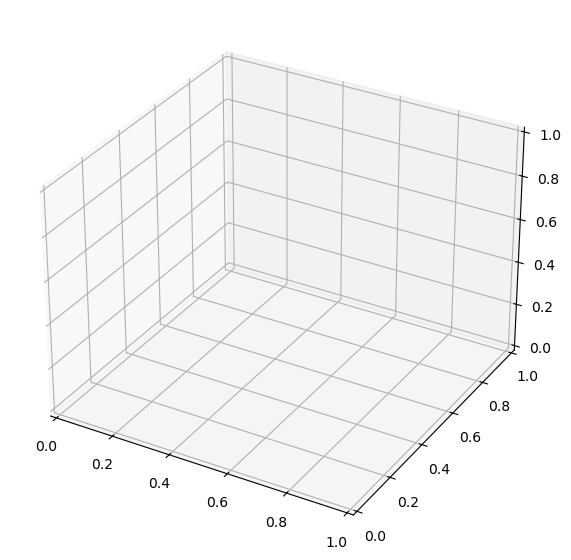

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_transformed[:,0], X_transformed[:,1], X_transformed[:,2] , c=y_binned.cat.codes,cmap='viridis', alpha=0.2, label='Actual Power')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Kernel PCA Projection (PC1, PC2 and PC3) Colored by Total Power interwals')
ax.legend()
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Total Power Bin")

tick_positions = range(len(y_binned.cat.categories))
tick_labels = [str(interval) for interval in y_binned.cat.categories]
cbar.set_ticks(tick_positions)
cbar.set_ticklabels(tick_labels)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_scaled, test_size=0.2, random_state=42)

In [ ]:
svr = SVR(C=10, kernel='rbf') #use SVR(optimal_params)
svr.fit(X_train, y_train.ravel())
y_pred = svr.predict(X_test)
y_rescaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
r2 = r2_score(y_test_rescaled, y_rescaled)
rmse = root_mean_squared_error(y_test_rescaled, y_rescaled)


In [ ]:
print(f"All future input to this ML model most be on the folliwing shape: {X_test.shape} i.e. transformed by the PCA")

All future input to this ML model most be on the folliwing shape: (7209, 49) i.e. transformed by the PCA


In [ ]:
proportion = kpca.eigenvalues_ / np.sum(kpca.eigenvalues_)
print(f"Perserves {proportion.sum()*100}% of the initial vairance")
print(f"{len(proportion)} features")

Perserves 99.99999999999999% of the initial vairance
49 features


We retained almost 100% of the variance using nonlinear transformation (i.e., Kernel PCA does a good job preserving information even after reducing features).

In [ ]:
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

R-squared: 0.9641736030064413
RMSE: 22978.683988171964


We got a very high R² = 0.964, indicating excellent model performance.
RMSE is close to that of SVR trained on all original features.

This indicates a strong nonlinear structure: Kernel PCA seems to uncover meaningful nonlinear patterns in the WEC data, which standard PCA or raw input may not fully exploit. Dimensionality reduction works well here: We preserved nearly all variance using fewer features. This often improves generalization and training speed.

We should perceed with this transformed data if we prioritize model performance and speed (fewer features).
and are okay with reduced interpretability, since Kernel PCA produces abstract features that are harder to interpret.

<h1>4 Gradient Boosting</h1>

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,root_mean_squared_error

In [ ]:
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train.ravel())
y_pred = gb_reg.predict(X_test)

In [ ]:
y_test_rescaled = target_scaler.inverse_transform(y_test)
y_pred_rescaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

r2 = r2_score(y_test_rescaled, y_pred_rescaled)
rmse = root_mean_squared_error(y_test_rescaled, y_pred_rescaled)

print("R²:", r2)
print("RMSE:", rmse)

R²: 0.9212961438930745
RMSE: 34058.192135785255


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

gb_pipeline = Pipeline([
    ('gb', GradientBoostingRegressor(random_state=42))
])

# Parameter grid
param_grid = {
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'gb__max_depth': [3, 5, 7]
}

# Grid Search
grid_search = GridSearchCV(
    gb_pipeline,
    param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train.ravel())

# Best parameters and estimator
best_gb = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = best_gb.predict(X_test)
y_pred_rescaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = target_scaler.inverse_transform(y_test)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'gb__learning_rate': 0.1, 'gb__max_depth': 5, 'gb__n_estimators': 300}


In [ ]:
# print(y_pred_rescaled[0])
# print(y_test_rescaled[0])

i=0
for pred, true in zip(y_pred_rescaled,y_test_rescaled):
    print(f"pred: {pred}")
    print(f"true: {true}")
    if i==5:
        break
    i+=1

pred: [3999655.75209833]
true: [4034732.52]
pred: [4087063.28644337]
true: [4090404.88]
pred: [3864948.69385936]
true: [3906697.13]
pred: [3867789.85581078]
true: [3869653.08]
pred: [3940085.01743792]
true: [3965178.]
pred: [3917539.89177545]
true: [3922896.07]


In [ ]:
print(f"Best parameters: {grid_search.best_params_}")
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
rmse = root_mean_squared_error(y_test_rescaled, y_pred_rescaled)


print("Tuned GB R²:", r2)
print("Tuned GB RMSE:", rmse)

Best parameters: {'gb__learning_rate': 0.1, 'gb__max_depth': 5, 'gb__n_estimators': 300}
Tuned GB R²: 0.9645369637268276
Tuned GB RMSE: 22861.859094375646


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_gb, X_train, y_train.ravel(), cv=5, scoring='neg_root_mean_squared_error')
print('Evaluations', scores)

Evaluations [-0.20597337 -0.19825386 -0.19889616 -0.19942327 -0.19747166]


In [ ]:
print(f'Mean:', -scores.mean())
print(f'Std:', scores.std())

Mean: 0.20000366399785663
Std: 0.003055279979390552


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []

for train_index, val_index in kf.split(X_scaled):
    X_train_cv, X_val_cv = X_scaled[train_index], X_scaled[val_index]
    y_train_cv, y_val_cv = y_scaled[train_index], y_scaled[val_index]

    gb = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=300)
    gb.fit(X_train_cv, y_train_cv.ravel())

    y_pred_cv = gb.predict(X_val_cv).reshape(-1, 1)

    # Inverse transform predictions and actuals to original scale
    y_pred_inv = target_scaler.inverse_transform(y_pred_cv)
    y_val_inv = target_scaler.inverse_transform(y_val_cv)

    rmse = np.sqrt(mean_squared_error(y_val_inv, y_pred_inv))
    rmse_scores.append(rmse)

# Final metrics
print("Cross-validated RMSE (Watts) for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("Std dev RMSE:", np.std(rmse_scores))


Cross-validated RMSE (Watts) for each fold: [np.float64(22877.547852351305), np.float64(24191.722440592792), np.float64(23837.080274080574), np.float64(24319.81759096836), np.float64(24062.4733097295)]
Mean RMSE: 23857.728293544504
Std dev RMSE: 515.398713369418


Use this call next time:

In [ ]:
KFOLD_test(GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=300), 5, X_scaled, y_scaled, target_scaler)

In [ ]:
pca_model(GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=300),
          KernelPCA(n_components=int(len(features)/2), kernel='rbf', gamma=0.01),
          scaled_df,
          target_scaler,
          features,
          target)

Cross-validated RMSE (Watts) for each fold: [np.float64(28967.74025065381), np.float64(28698.01838077565), np.float64(29451.109272271515), np.float64(28981.70486986832), np.float64(28394.212598079386)]
Mean RMSE: 28898.557074329736
Std dev RMSE: 349.7407375688808


[np.float64(28967.74025065381),
 np.float64(28698.01838077565),
 np.float64(29451.109272271515),
 np.float64(28981.70486986832),
 np.float64(28394.212598079386)]

K-fold function for scaled variables:

In [ ]:
feature_x = 'X1'
feature_y = 'Y1'
x_range = np.linspace(per[feature_x].min(), per[feature_x].max(), 50)
y_range = np.linspace(per[feature_y].min(), per[feature_y].max(), 50)
xx, yy = np.meshgrid(x_range, y_range)

# # Prepare input for prediction
grid = pd.DataFrame({feature_x: xx.ravel(), feature_y: yy.ravel()})

# Fill missing features with mean values
for col in features:
    if col not in grid.columns:
        grid[col] = per[col].mean()

# Scale features using your feature scaler
grid_scaled = feature_scaler.transform(grid[features])

predicted = best_gb.predict(grid_scaled)
# predicted = predicted.reshape(xx.shape) #is scaled
predicted = target_scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(xx.shape)




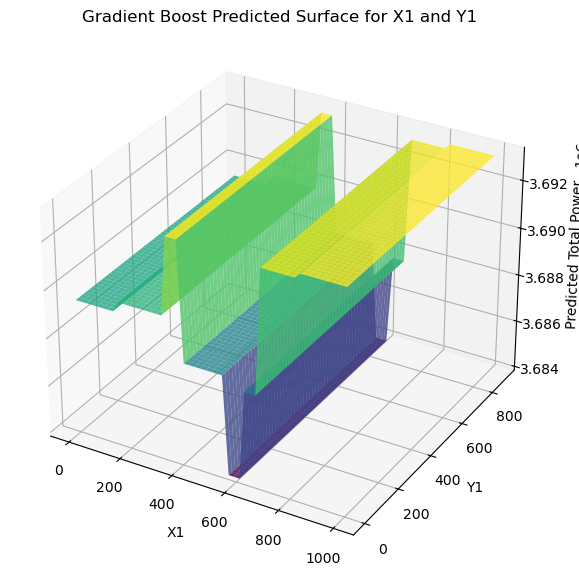

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx, yy, predicted, cmap='viridis', alpha=0.8)
ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)
ax.set_zlabel('Predicted Total Power')
ax.set_title('Gradient Boost Predicted Surface for X1 and Y1')
plt.show()


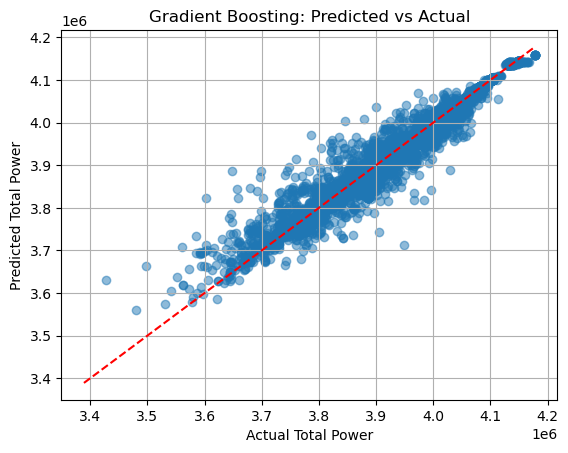

In [ ]:
scatter_true_pred('Total_Power', y_test_rescaled, y_pred_rescaled, 'Gradient Boosting')

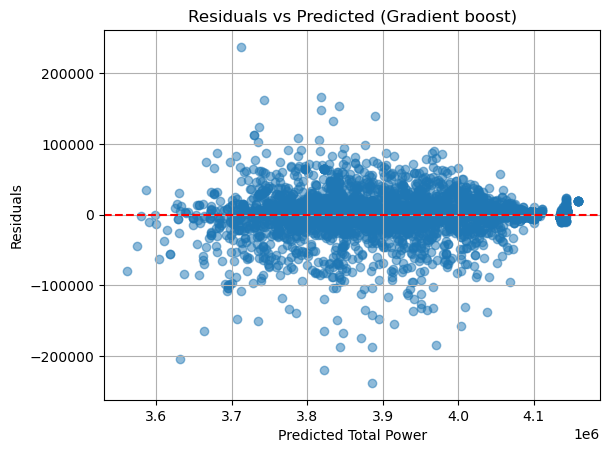

In [ ]:
residuals = y_test_rescaled.flatten() - y_pred_rescaled.flatten()
plt.scatter(y_pred_rescaled, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Total Power")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Gradient boost)")
plt.grid(True)
plt.show()


<b>If were're comparing to models that do require scaling (like SVR), it's useful to keep the inputs consistent.
If your target (y) is very skewed or has outliers, sometimes scaling or log-transforming it improves performance.</b>

![image.png](attachment:9c08a421-5fb3-44ae-821b-e8d7a6c11f8c.png)

# Scratchbook